In [1]:
#dependecies
import requests
from pprint import pprint
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the academy award winning gender race csv 
award_race_csv = 'Output/award_winning_gender_race.csv'
award_race_df = pd.read_csv(award_race_csv)

#adding a Type column to identify this dataframe when we merge below
award_race_df['Type'] = 'Academy Award Films'
award_race_df.head()

,Year,Movie Title,Actor,Gender,Race,Type
0,1927,Wings,Clara Bow,Female,White,Academy Award Films
1,1927,Wings,Charles 'Buddy' Rogers,Male,White,Academy Award Films
2,1927,Wings,Richard Arlen,Male,White,Academy Award Films
3,1927,Wings,Jobyna Ralston,Female,White,Academy Award Films
4,1928,The Broadway Melody,Charles King,Male,White,Academy Award Films


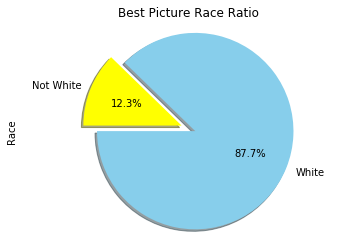

In [3]:
#plotting the pie chart for best picture race percentages
award_race_pie = award_race_df["Race"].value_counts()

colors = ['skyblue', 'yellow']
explode = (0, 0.15)

award_race_pie.plot(kind="pie",autopct="%1.1f%%", explode=explode, colors=colors,shadow=True, startangle=180)

#plotting labels and title
plt.title("Best Picture Race Ratio")
plt.axis("equal")
plt.show()

In [4]:
#saving the figure to a png file and showing it in our notebook
plt.savefig("Images/Award_Race.png")

plt.show()

<Figure size 432x288 with 0 Axes>

In [5]:
#reading the top grossing gender race csv 
topgrossing_race_csv = 'Output/top_grossing_film_gender_race.csv'
topgrossing_race_df = pd.read_csv(topgrossing_race_csv)

#renaming column Actors to Actor
topgrossing_race_df = topgrossing_race_df.rename(columns = {"Actors" : "Actor"})

#adding a Type column to identify this dataframe when we merge below
topgrossing_race_df['Type'] = "Top Grossing Films"
topgrossing_race_df.head()

,Year,Movie Title,Actor,Gender,Race,Type
0,1927,The Battles of the Coronel and Falkland Islands,Roger Maxwell,Male,White,Top Grossing Films
1,1927,The Battles of the Coronel and Falkland Islands,Craighall Sherry,Male,White,Top Grossing Films
2,1927,The Battles of the Coronel and Falkland Islands,Hans von Slock,Male,White,Top Grossing Films
3,1928,Lights of New York,Helene Costello,Female,White,Top Grossing Films
4,1928,Lights of New York,Cullen Landis,Male,White,Top Grossing Films


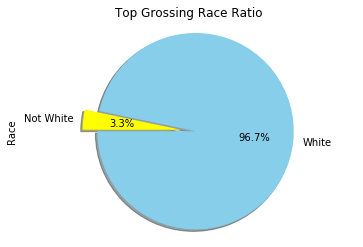

In [6]:
#plotting the pie chart for top grossing films gender percentages
topgrossing_race_pie = topgrossing_race_df["Race"].value_counts()

colors = ['skyblue', 'yellow']
explode = (0, 0.15)

topgrossing_race_pie.plot(kind="pie",autopct="%1.1f%%", explode=explode, colors=colors,shadow=True, startangle=180)

plt.title("Top Grossing Race Ratio")
plt.axis("equal")
plt.show()

In [7]:
#saving the figure to a png file and showing it in our notebook
plt.savefig("Images/TopGrossing_Race.png")

plt.show()

<Figure size 432x288 with 0 Axes>

In [8]:
#combined above two dataframes
combined_race = award_race_df.append(topgrossing_race_df)
combined_race.head()

,Year,Movie Title,Actor,Gender,Race,Type
0,1927,Wings,Clara Bow,Female,White,Academy Award Films
1,1927,Wings,Charles 'Buddy' Rogers,Male,White,Academy Award Films
2,1927,Wings,Richard Arlen,Male,White,Academy Award Films
3,1927,Wings,Jobyna Ralston,Female,White,Academy Award Films
4,1928,The Broadway Melody,Charles King,Male,White,Academy Award Films


In [11]:
#grouping by Type and then Race and counting how many by using the Actor column
grouped_race = combined_race.groupby(['Type', 'Race']).count()
grouped_race

Year  Movie Title  Actor  Gender
Type                Race                                       
Academy Award Films Not White    45           45     45      45
                    White       322          322    322     322
Top Grossing Films  Not White    12           12     12      12
                    White       353          353    353     353

In [12]:
#re-indexing the groupby to get a better view and work wit the dataframe
indexed_race = grouped_race.reset_index()
indexed_race

,Type,Race,Year,Movie Title,Actor,Gender
0,Academy Award Films,Not White,45,45,45,45
1,Academy Award Films,White,322,322,322,322
2,Top Grossing Films,Not White,12,12,12,12
3,Top Grossing Films,White,353,353,353,353


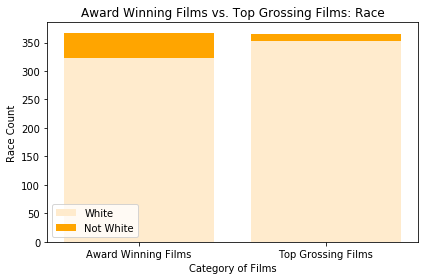

In [27]:
#plotting a stacked bar graph to compare the number of white and not white actors in the award winning films and top grossing films
values_race = ['Award Winning Films', 'Top Grossing Films']
N = 2
xaxis = np.arange(N)
white = tuple(indexed_race[indexed_race['Race'] == 'White']['Actor'])
not_white = tuple(indexed_race[indexed_race['Race'] == 'Not White']['Actor'])
fig1 = plt.bar(xaxis, white, color = 'blanchedalmond')
fig2 = plt.bar(xaxis, not_white,
               bottom = white,
              color = 'orange')
plt.xticks(xaxis, values_race)
plt.xlabel('Category of Films')
plt.ylabel('Race Count')
plt.title('Award Winning Films vs. Top Grossing Films: Race')
plt.tight_layout()
plt.legend((fig1[0], fig2[0]), ('White', 'Not White'))

plt.show()

In [28]:
#saving the figure to a png file and showing it in our notebook
plt.savefig("Images/Stacked_Bar_Race.png")

plt.show()

<Figure size 432x288 with 0 Axes>